
# Clean and Analyze Employee Exit Surveys


<ul>
<li><a href="#bu">1. Business Understanding.</a></li>
<li><a href="#du">2. Data Understanding.</a></li>    
<li><a href="#dp">3. Prepare Data.</a></li>
<li><a href="#md">4. Model Data</a></li>
<li><a href="#r">5. Results</a></li>
</ul>

<a id='intro'></a>
# 1. Business Understanding

Hi All!
Today we are going to take a look at the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute data. The data has been downloaded from the institute's site and you can find them [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)


Our main goal is to clean, prepare and combine the two datasets to answer the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

<a id='du'></a>
# 2. Data Understanding

Here we used the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute data to attempt to answer our questions of interest. In this case, using the data to help us arrive at our questions of interest. We combined the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. 
This is a preview of a couple of columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey

SeparationType: The reason why the person's employment ended

Cease Date: The year or month the person's employment ended

DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple of columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey

Reason for ceasing employment: The reason why the person's employment ended

LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

<a id='dp'></a>
# 3. Prepare Data

In [290]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [291]:
# Read csv to Pandas
dete_survey = pd.read_csv('dete_survey.csv', encoding='latin1')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='latin1')

In [292]:
# Print first 5 rows
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [293]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [294]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


For DETE survey there are 56 columns with 822 entries, as we can see some columns contain NAN values like Opportunities for promotion, Wellness programs, Aboriginal and others. Also, empty values are referring as Not stated. There are many columns that we don't need for our project. 

In [295]:
# Print first 5 rows
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [296]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [297]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


For TAFE survey we can see here as well a lot of columns with NAN values. We don't need all the columns for our project.
Both surveys have the same columns but with a different title. Also, some multiple columns/answers indicate an employee resigned because they were dissatisfied..

## Identify missing values and Drop unneccessary columns

In [298]:
# Read the Not Stated values in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [299]:
# Drop unneccessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [300]:
# Drop unneccessary columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [301]:
# Print first 5 rows
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [302]:
# Print first 5 rows
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We have replaced the Not stated and - values with Nan values, and drop all the unneccessary columns from doth data frames, to have more clean dataframes. 

## Standardize column names

In [303]:
# Replace space with _, remove whitespace from end, make all capitalization lowercase
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [304]:
# Replace space with _, remove whitespace from end, make all capitalization lowercase
tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._    what_is_your_gender?', 'currentage._    current_age',
       'employment_type._    employment_type',
       'classification._    classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_year

In [305]:
# Rename columns
tafe_survey_updated.rename(columns={'record_id': 'id', 'cessation_year': 'cease_date', 'reason_for_ceasing_employment': 'separationtype', 'gender._what_is_your_gender?': 'gender', 'currentage._current_age': 'age', 'employment_type._employment_type': 'employment_status', 'classification._classification': 'position', 'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service', 'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'role_service'}, inplace=True)

In [306]:
tafe_survey_updated.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,...,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._ what_is_your_gender?,currentage._ current_age,employment_type._ employment_type,classification._ classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [307]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We have changed columns names from uppercase to lower, remove whitespace from the end of the strings, replace space with _ and rename columns name from tafe_survey_updated. This will help us to work with ease on both dataframes.

## Remove unneeded Data

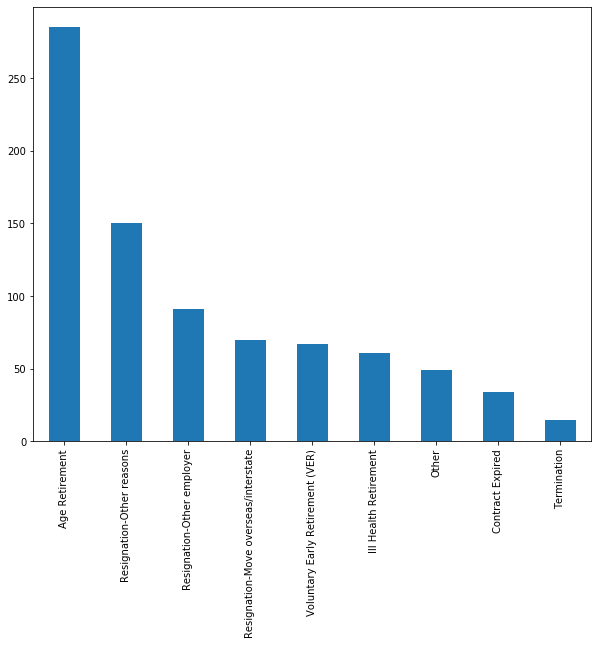

In [308]:
# Check unique values for column separationtype
dete_survey_updated['separationtype'].value_counts().plot(kind='bar', figsize=(10,8), width=0.5)

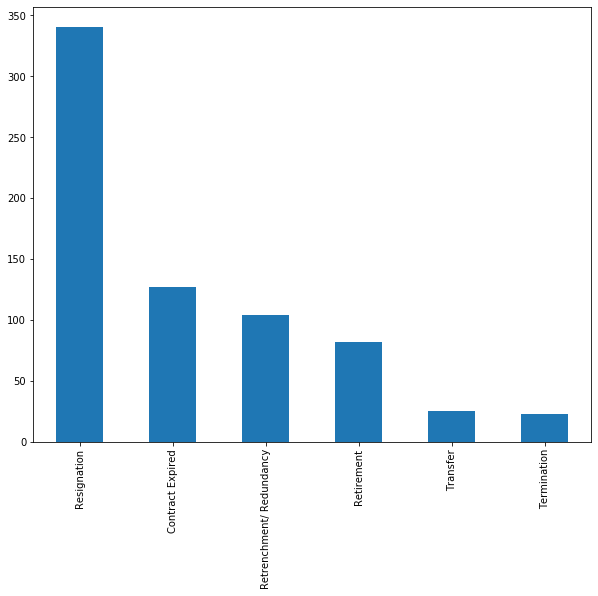

In [309]:
# Check unique values for column separationtype
tafe_survey_updated['separationtype'].value_counts().plot(kind='bar', figsize=(10,8), width=0.5)

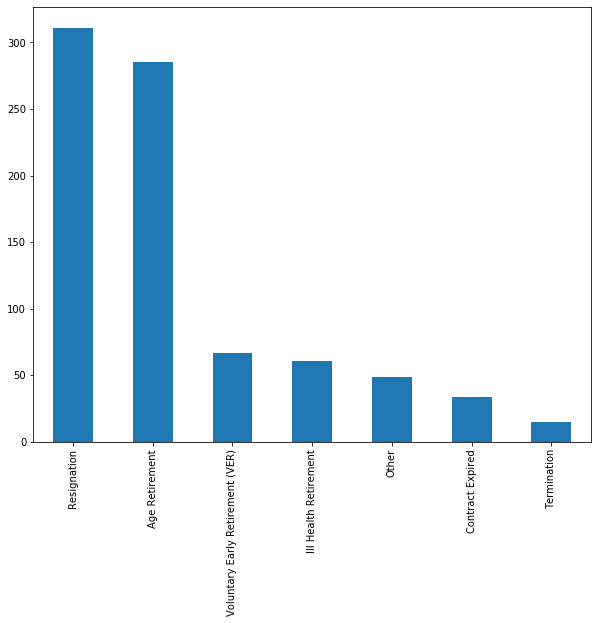

In [310]:
# Update all separation types containing the word Resignation to Resignation
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts().plot(kind='bar', figsize=(10,8), width=0.5)

In [311]:
# Select only the resignation separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

In [312]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [313]:
# Select only the resignation separation type
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,...,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._ what_is_your_gender?,currentage._ current_age,employment_type._ employment_type,classification._ classification,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Work with date columns

In [314]:
# Count the unique values in the column cease_date
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [315]:
# Transform the dates deleting slash and month and convert them to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [316]:
# Print sorted unique values
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [317]:
# Print sorted unique values
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [318]:
# Print sorted unique values
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as it is.

## Add New Column

Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. To analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [319]:
# Create new column subtracting  dete_start_date from cease_date
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [320]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Dissatisfied factor

In [321]:
# Print columns
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._    what_is_your_gender?', 'currentage._    current_age',
       'employment_type._    employment_type',
       'classification._    classification', 'institute_service',
       'role_service'],
      dtype='object')

In [322]:
# Print unique values
tafe_resignations['contributing_factors._job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors._job_dissatisfaction, dtype: int64

In [323]:
# Print unique values
tafe_resignations['contributing_factors._dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors._dissatisfaction, dtype: int64

In [324]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors._dissatisfaction', 'contributing_factors._job_dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [325]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine Datasets

In [326]:
# Create mew column for each dataset 
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [327]:
# Combine datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._ what_is_your_gender?,currentage._ current_age,employment_type._ employment_type,classification._ classification,role_service
0,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated

,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation,2012.0,7,False,DETE
1,6,Resignation,2012.0,18,True,DETE
2,9,Resignation,2012.0,3,False,DETE
3,10,Resignation,2012.0,15,True,DETE
4,12,Resignation,2012.0,3,False,DETE
...,...,...,...,...,...,...
646,635065973820625000,Resignation,2013.0,5-6,False,TAFE
647,635066785175197000,Resignation,2013.0,1-2,False,TAFE
648,635067716405666000,Resignation,2013.0,NaN,False,TAFE
649,635070442972541000,Resignation,2013.0,5-6,False,TAFE


## Clean up the institute_service column

In [329]:
# Convert column to string
combined_updated['institute_service'].astype('str')

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

In [330]:
# Count unique values including NaN
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [331]:
# Extract the years of service and convert the type to float
combined_updated = combined_updated.copy()
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [332]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

<a id='md'></a>
# 4. Model Data

In [333]:
# Count unique values including NaN
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [334]:
# Fill NaN values with the higher frequency answer
combined_updated['dissatisfied'].fillna(False, inplace=True)

In [335]:
# Count unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [336]:
# Create Pivot table for plotting 
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

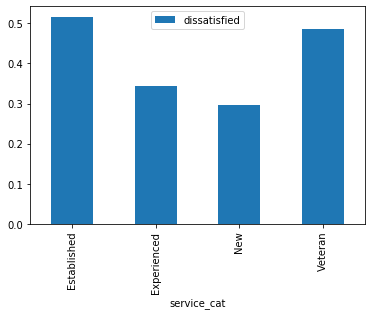

In [337]:
# Create bar
dis_pct.plot(kind='bar')

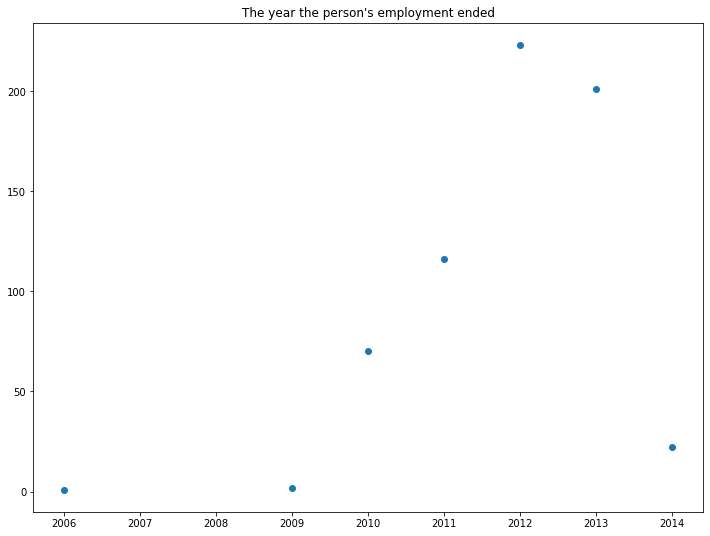

In [338]:
# Plot a line to see the year of employment ends
combined_updated['cease_date'].value_counts().plot(kind='line', style='o', figsize=(12,9), title="The year the person's employment ended")

<a id='r'></a>
# 5. Results
From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.
As we can see from the chart for 2007 and 2008 there is no data. The year with the highest number of resignations is in 2012 followed by 2013. And with the least resignations are the years 2006 and 2009.